# Сводные таблицы - Pivot Tables

Сводные таблицы позволяют поменять структуру данных, преобразуя ячейки данных с помощью нового индекса.

Датафрейм с повторяющимися значениями можно реогранизовать. Если в какой-то колонке значения повторяются, то эти значения можно расположить не в одной колонке, а создать для них отдельные колонки или отдельные строки для каждого отдельного значения. Основная цель в таком случае - сделать чтение данных более понятным.

## Метод .pivot()

Метод .pivot() меняет форму данных на основе значений колонок, меняя индекс. **Важно: не всегда имеет смысл создавать сводные данные!**  Методы .pivot() в основном нужны для анализа данных, их визуализации и исследования.

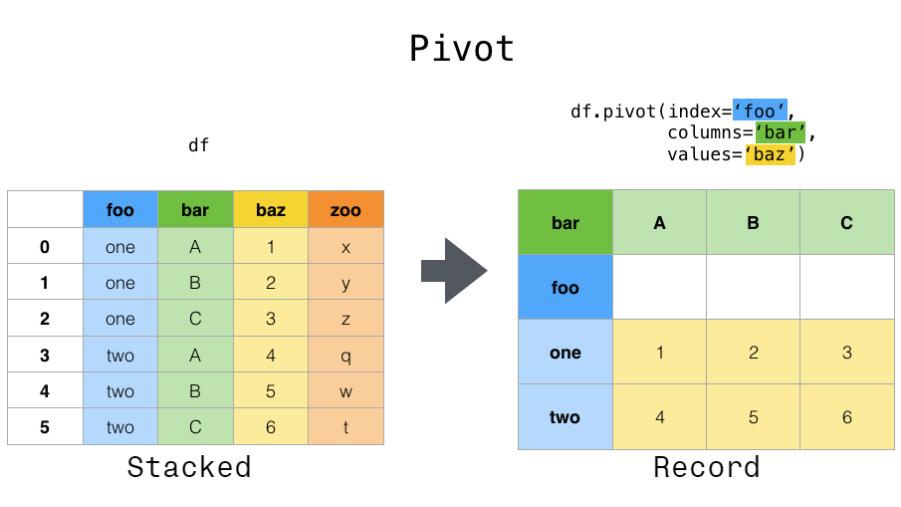

В методе **.pivot()** мы указываем, какой будет новый индекс, какие будут новые колонки и какие будт значения. Те колонки, которые были выбраны в качестве нового индекса и новых колонок, в исходном датафрейме встречаются повторяющиеся значения. 

В нашем примере индекс выбирается по колонке **foo**. В исходном датафрейме эта колонка принимает два значения *one* и *two*. По сути для этих уникальных значений создается отдельная строка.   
Далее в качестве новых колонок указываем колонку **bar**, в которой три значения *A*, *B*, *C* - они становятся отдельными колонками в новом датафрейме.  
В качестве значений выбирается колонка **baz** - это те значения, которые располагаются в самих ячейках новой таблицы.  
В итоге, в новой таблице удобнее находить ответы на поставленные вопросы

Различные методы создания сводных таблиц описаны в документации: https://pandas.pydata.org/docs/user_guide/reshaping.html

----
#### Замечание: частая ошибка - студенты часто случайным образом выбирают значения index,column и value и смотрят, что в результате получится. Такой подход может приводить к тому, что данные выглядят не так, как Вам хотелось бы. Более разумный подход - ответить на вопросы ниже ПЕРЕД тем, как запускать метод pivot():

* На какой вопрос Вы хотите получить ответ?
* Как должны выглядеть данные, чтобы ответить на этот вопрос? Возможно данные уже в таком виде, что pivot() запускать не нужно.
* Как должны выглядеть финальные данные после применения pivot? Нужны ли все исходные колонки?

-----

In [2]:
import numpy as np
import pandas as pd

--------
**На какой тип вопросов помогает ответить pivot?**

**Представим себе такую задачу. Необходимо узнать, сколько лицензий каждого продукта было куплено компанией Google. Сейчас данные отформатированы таким образом, что сложно увидеть ответ на этот вопрос. С помощью pivot поменяем данные - возьмём только те колонки, которые помогут нам ответить на поставленный вопрос.**

In [11]:
df = pd.read_csv('Sales_Funnel_CRM.csv')
df.head()

,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won


In [13]:
help(pd.pivot)

Help on function pivot in module pandas.core.reshape.pivot:

pivot(data: 'DataFrame', *, columns: 'IndexLabel', index: 'IndexLabel | lib.NoDefault' = <no_default>, values: 'IndexLabel | lib.NoDefault' = <no_default>) -> 'DataFrame'
    Return reshaped DataFrame organized by given index / column values.
    
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from specified `index` / `columns` to form axes of the
    resulting DataFrame. This function does not support data
    aggregation, multiple values will result in a MultiIndex in the
    columns. See the :ref:`User Guide <reshaping>` for more on reshaping.
    
    Parameters
    ----------
    data : DataFrame
    columns : str or object or a list of str
        Column to use to make new frame's columns.
    index : str or object or a list of str, optional
        Column to use to make new frame's index. If not given, uses existing index.
    values : str, object or a list of the previous, op

In [15]:
# Возьмем поднабор данных - только отдельные колонки
licenses = df[['Company','Licenses','Product']]
licenses.head()

,Company,Licenses,Product
0,Google,150,Analytics
1,Google,150,Prediction
2,Google,300,Tracking
3,BOBO,150,Analytics
4,IKEA,300,Analytics


In [21]:
pd.pivot(data=licenses, index='Company', columns='Product', values='Licenses')

Product,Analytics,GPS Positioning,Prediction,Tracking
Company,,,,
Google,150.0,NaN,150.0,300.0
ATT,NaN,NaN,150.0,150.0
Apple,300.0,NaN,NaN,NaN
BOBO,150.0,NaN,NaN,NaN
CVS Health,NaN,NaN,NaN,450.0
Cisco,300.0,300.0,NaN,NaN
Exxon Mobile,150.0,NaN,NaN,NaN
IKEA,300.0,NaN,NaN,NaN
Microsoft,NaN,NaN,NaN,300.0


## Метод .pivot_table()
По анаогии с методом pivot(), можно с помощью .pivot_table() добавить использование агрегирующих функций.

---
**Представим, что мы хотим найти суммарное количество лицензий и сумму продаж для каждой из компаний**

In [29]:
# Важно: для номера лицевого счёта (Account Number) 
# функция sum() не имеет смысла, потому что это поле несуммируемое
pd.pivot_table(df, index='Company', aggfunc='sum').select_dtypes(include='number')

,Account Number,Licenses,Sale Price
Company,,,
Google,6370194,600,3150000
ATT,1396064,300,1050000
Apple,405886,300,4550000
BOBO,2192650,150,2450000
CVS Health,902797,450,490000
Cisco,4338998,600,4900000
Exxon Mobile,470248,150,2100000
IKEA,420496,300,4550000
Microsoft,1216870,300,350000


In [31]:
# Либо берём колонки
pd.pivot_table(df,index="Company",aggfunc='sum')[['Licenses','Sale Price']]

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


In [33]:
# Либо обозначем их как целевые значения (values)
pd.pivot_table(df, index='Company', aggfunc='sum', values=['Licenses', 'Sale Price'])

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


## Как это можно сделать с помощью .groupby()

In [40]:
df.groupby('Company').sum().select_dtypes(include='number')

,Account Number,Licenses,Sale Price
Company,,,
Google,6370194,600,3150000
ATT,1396064,300,1050000
Apple,405886,300,4550000
BOBO,2192650,150,2450000
CVS Health,902797,450,490000
Cisco,4338998,600,4900000
Exxon Mobile,470248,150,2100000
IKEA,420496,300,4550000
Microsoft,1216870,300,350000


In [42]:
df.groupby('Company').sum()[['Licenses', 'Sale Price']]

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


## Пример с мульти-индексом

---
**Один менеджер может заниматься продажами для разных клиентов**

In [46]:
pd.pivot_table(df, index=['Account Manager', 'Contact'], values=['Sale Price'], aggfunc='sum')

Sale Price
Account Manager Contact                 
Claude Shannon  Cindy Phoner     7700000
                Emma Gordian    12390000
Edward Thorp    Elon Tusk        8050000
                Larry Pager      5600000
                Will Grates      2800000

Параметр columns опционален - с его помощью можно дополнительно сегментировать интересующие значения.  
К значениям, перечисленным в списке values, применяются агрегирующие функции.

In [51]:
pd.pivot_table(df, index=['Account Manager', 'Contact'], values=['Sale Price'], columns=['Product'], aggfunc='sum')

Sale Price                                     
Product                        Analytics GPS Positioning Prediction  Tracking
Account Manager Contact                                                      
Claude Shannon  Cindy Phoner   6650000.0             NaN   700000.0  350000.0
                Emma Gordian  11550000.0        350000.0        NaN  490000.0
Edward Thorp    Elon Tusk      7350000.0             NaN   700000.0       NaN
                Larry Pager    4550000.0             NaN   700000.0  350000.0
                Will Grates    2450000.0             NaN        NaN  350000.0

Тут мы получаем двух уровневый индекс по строкам - Account Manager и Contact, а также по колонкам - Sale Price на первом уровне и отдельные продукты на втором. Это с точки зрения Pandas.

По сути, если посмотреть на значения в ячейках, можно заметить, что агрегация данных была выполнена по трем колонкам - **Account Manager**, **Contact** и **Product**. При этом  **Account Manager** и **Contact** - расположены в строках, а **Product** - в колонках. Именно такое поведение отличает **.pivot_table()** от **.groupby()**, в котором все три колонки располагались бы в строках.

In [57]:
# Можно заменить значения NaN
pd.pivot_table(df,index=["Account Manager","Contact"],values=["Sale Price"],columns=["Product"],aggfunc=[np.sum],fill_value=0)

C:\Users\chern\AppData\Local\Temp\ipykernel_12616\834926455.py:2: FutureWarning: The provided callable <function sum at 0x000001D0E2775B80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,index=["Account Manager","Contact"],values=["Sale Price"],columns=["Product"],aggfunc=[np.sum],fill_value=0)


sum                                    
                             Sale Price                                    
Product                       Analytics GPS Positioning Prediction Tracking
Account Manager Contact                                                    
Claude Shannon  Cindy Phoner    6650000               0     700000   350000
                Emma Gordian   11550000          350000          0   490000
Edward Thorp    Elon Tusk       7350000               0     700000        0
                Larry Pager     4550000               0     700000   350000
                Will Grates     2450000               0          0   350000

In [59]:
# Можно указать несколько агрегирующих функций
pd.pivot_table(df,index=["Account Manager","Contact"],values=["Sale Price"],columns=["Product"],
               aggfunc=[np.sum,np.mean],fill_value=0)

C:\Users\chern\AppData\Local\Temp\ipykernel_12616\2238529191.py:2: FutureWarning: The provided callable <function sum at 0x000001D0E2775B80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,index=["Account Manager","Contact"],values=["Sale Price"],columns=["Product"],
C:\Users\chern\AppData\Local\Temp\ipykernel_12616\2238529191.py:2: FutureWarning: The provided callable <function mean at 0x000001D0E2779AF0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df,index=["Account Manager","Contact"],values=["Sale Price"],columns=["Product"],


sum                                      \
                             Sale Price                                       
Product                       Analytics GPS Positioning Prediction Tracking   
Account Manager Contact                                                       
Claude Shannon  Cindy Phoner    6650000               0     700000   350000   
                Emma Gordian   11550000          350000          0   490000   
Edward Thorp    Elon Tusk       7350000               0     700000        0   
                Larry Pager     4550000               0     700000   350000   
                Will Grates     2450000               0          0   350000   

                                   mean                                       
                             Sale Price                                       
Product                       Analytics GPS Positioning Prediction  Tracking  
Account Manager Contact                                                       
Claude Shannon  Cindy Phoner  3325000.0             0.0   700000.0  350000.0  
                Emma Gordian  5775000.0        350000.0        0.0  490000.0  
Edward Thorp    Elon Tusk     3675000.0             0.0   700000.0       0.0  
                Larry Pager   2275000.0             0.0   700000.0  350000.0  
                Will Grates   2450000.0             0.0        0.0  350000.0

В этом случае получается третий уровень мульти-индекса

In [62]:
# Можно указать несколько колонок
pd.pivot_table(df,index=["Account Manager","Contact"],values=["Sale Price","Licenses"],columns=["Product"],
               aggfunc=[np.sum],fill_value=0)

C:\Users\chern\AppData\Local\Temp\ipykernel_12616\3898604373.py:2: FutureWarning: The provided callable <function sum at 0x000001D0E2775B80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,index=["Account Manager","Contact"],values=["Sale Price","Licenses"],columns=["Product"],


sum                                      \
                              Licenses                                       
Product                      Analytics GPS Positioning Prediction Tracking   
Account Manager Contact                                                      
Claude Shannon  Cindy Phoner       450               0        150      150   
                Emma Gordian      1050             300          0      450   
Edward Thorp    Elon Tusk          600               0        150        0   
                Larry Pager        300               0        150      300   
                Will Grates        150               0          0      300   

                                                                             
                             Sale Price                                      
Product                       Analytics GPS Positioning Prediction Tracking  
Account Manager Contact                                                      
Claude Shannon  Cindy Phoner    6650000               0     700000   350000  
                Emma Gordian   11550000          350000          0   490000  
Edward Thorp    Elon Tusk       7350000               0     700000        0  
                Larry Pager     4550000               0     700000   350000  
                Will Grates     2450000               0          0   350000

In [64]:
# Можно указать несколько колонок
pd.pivot_table(df,index=["Account Manager","Contact","Product"],values=["Sale Price","Licenses"],
               aggfunc=[np.sum],fill_value=0)

C:\Users\chern\AppData\Local\Temp\ipykernel_12616\3439324339.py:2: FutureWarning: The provided callable <function sum at 0x000001D0E2775B80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,index=["Account Manager","Contact","Product"],values=["Sale Price","Licenses"],


sum           
                                             Licenses Sale Price
Account Manager Contact      Product                            
Claude Shannon  Cindy Phoner Analytics            450    6650000
                             Prediction           150     700000
                             Tracking             150     350000
                Emma Gordian Analytics           1050   11550000
                             GPS Positioning      300     350000
                             Tracking             450     490000
Edward Thorp    Elon Tusk    Analytics            600    7350000
                             Prediction           150     700000
                Larry Pager  Analytics            300    4550000
                             Prediction           150     700000
                             Tracking             300     350000
                Will Grates  Analytics            150    2450000
                             Tracking             300     350000

In [66]:
# Можно получить финальную строку "ИТОГО" - "ALL", указав значение margins = True
pd.pivot_table(df,index=["Account Manager","Contact","Product"],values=["Sale Price","Licenses"],
               aggfunc=[np.sum],fill_value=0,margins=True)

C:\Users\chern\AppData\Local\Temp\ipykernel_12616\875878532.py:2: FutureWarning: The provided callable <function sum at 0x000001D0E2775B80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,index=["Account Manager","Contact","Product"],values=["Sale Price","Licenses"],


sum           
                                             Licenses Sale Price
Account Manager Contact      Product                            
Claude Shannon  Cindy Phoner Analytics            450    6650000
                             Prediction           150     700000
                             Tracking             150     350000
                Emma Gordian Analytics           1050   11550000
                             GPS Positioning      300     350000
                             Tracking             450     490000
Edward Thorp    Elon Tusk    Analytics            600    7350000
                             Prediction           150     700000
                Larry Pager  Analytics            300    4550000
                             Prediction           150     700000
                             Tracking             300     350000
                Will Grates  Analytics            150    2450000
                             Tracking             300     350000
All                                              4500   36540000

In [68]:
pd.pivot_table(df,index=["Account Manager","Status"],values=["Sale Price"],
               aggfunc=[np.sum],fill_value=0,margins=True)

C:\Users\chern\AppData\Local\Temp\ipykernel_12616\1617676898.py:1: FutureWarning: The provided callable <function sum at 0x000001D0E2775B80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,index=["Account Manager","Status"],values=["Sale Price"],


sum
                             Sale Price
Account Manager Status                 
Claude Shannon  Lost            4550000
                Presented       3150000
                Under Review     350000
                Won            12040000
Edward Thorp    Lost            4900000
                Presented       3500000
                Under Review    3500000
                Won             4550000
All                            36540000